using k-nearest neighbors algorithm to predict car prices

import libraries

In [94]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns=99

load data set

In [72]:
cars=pd.read_csv('imports-85.data')

explore data

In [73]:
print(cars.head(5))
print(cars.shape)

   3    ?  alfa-romero  gas  std   two  convertible  rwd  front  88.60  \
0  3    ?  alfa-romero  gas  std   two  convertible  rwd  front   88.6   
1  1    ?  alfa-romero  gas  std   two    hatchback  rwd  front   94.5   
2  2  164         audi  gas  std  four        sedan  fwd  front   99.8   
3  2  164         audi  gas  std  four        sedan  4wd  front   99.4   
4  2    ?         audi  gas  std   two        sedan  fwd  front   99.8   

   168.80  64.10  48.80  2548  dohc  four  130  mpfi  3.47  2.68  9.00  111  \
0   168.8   64.1   48.8  2548  dohc  four  130  mpfi  3.47  2.68   9.0  111   
1   171.2   65.5   52.4  2823  ohcv   six  152  mpfi  2.68  3.47   9.0  154   
2   176.6   66.2   54.3  2337   ohc  four  109  mpfi  3.19  3.40  10.0  102   
3   176.6   66.4   54.3  2824   ohc  five  136  mpfi  3.19  3.40   8.0  115   
4   177.3   66.3   53.1  2507   ohc  five  136  mpfi  3.19  3.40   8.5  110   

   5000  21  27  13495  
0  5000  21  27  16500  
1  5000  19  26  16500  
2  55

**issue**: data set does not contain headers<br>
**solution**: manually set the column headers

In [74]:
column_headers=[
    'symboling', 
    'normalized-losses',
    'make', 
    'fuel-type',
    'aspiration',
    'num-of-doors',
    'body-style',
    'drive-wheels',
    'engine-location', 
    'wheel-base',
    'length', 
    'width', 
    'height', 
    'curb-weight', 
    'engine-type', 
    'num-of-cylinders', 
    'engine-size', 
    'fuel-system', 
    'bore',
    'stroke', 
    'compression-ratio',
    'horsepower', 
    'peak-rpm', 
    'city-mpg', 
    'highway-mpg',
    'price'
    ]
cars=pd.read_csv('imports-85.data', names=column_headers)

In [75]:
print(cars.head(5))
print(cars.shape)

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  width  \
0  convertible          rwd           front        88.6   168.8   64.1   
1  convertible          rwd           front        88.6   168.8   64.1   
2    hatchback          rwd           front        94.5   171.2   65.5   
3        sedan          fwd           front        99.8   176.6   66.2   
4        sedan          4wd           front        99.4   176.6   66.4   

   height  curb-weight engine-type num-of-cylinders  engine-size fue

determine which columns are numeric and the target column

In [76]:
numeric_columns=[
    'normalized-losses', 
    'wheel-base', 
    'length', 
    'width', 
    'height', 
    'curb-weight', 
    'engine-size', 
    'bore', 
    'stroke', 
    'compression-ratio', 
    'horsepower', 
    'peak-rpm', 
    'city-mpg', 
    'highway-mpg', 
    'price'
    ]

# data clean up

-  replace '?' values
-  remove rows where price is null
-  replace null values with averages
-  normalize columns to between 0 and 1 except target column (price)

In [77]:
cars_clean=cars[numeric_columns].replace('?', np.nan).astype('float')
cars_clean=cars_clean.dropna(subset=['price'])
# cars_clean=cars_clean.fillna(cars_clean.mean(axis=0))
cars_clean=cars_clean.fillna(cars_clean.mean())
print(cars_clean.isnull().sum())
price=cars_clean['price']
# cars_clean=(cars_clean-cars_clean.min(axis=0))/(cars_clean.max(axis=0)-cars_clean.min(axis=0))
cars_clean=(cars_clean-cars_clean.min())/(cars_clean.max()-cars_clean.min())
cars_clean['price']=price

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


# model building
## univariate k-nearest neighbors model

In [78]:
#training_col as a matrix object
def knn_train_test(training_col, target_col, df): 
    np.random.seed(1)
    shuffled_df=df.reindex(np.random.permutation(df.index))
    last_train_row=int(len(shuffled_df)/2)
    train_df=shuffled_df.iloc[0:last_train_row]
    test_df=shuffled_df.iloc[last_train_row:]
    knn=KNeighborsRegressor()
    knn.fit(train_df[training_col], train_df[target_col])
    predictions=knn.predict(test_df[training_col])
    rmse=math.sqrt(mean_squared_error(test_df[target_col], predictions))
    return rmse

In [79]:
train_columns=numeric_columns
train_columns.remove('price')

test performance of each feature using default k value

In [81]:
rmse_per_feat={}
for each_column in train_columns:
    train_feat=[each_column]
    rmse=knn_train_test(train_feat, 'price', cars_clean)
    rmse_per_feat[each_column]=rmse
print(rmse_per_feat)

{'height': 8144.441042663747, 'horsepower': 4037.0377131537603, 'width': 4704.482589704386, 'city-mpg': 4766.422505090134, 'engine-size': 3238.4628296477176, 'peak-rpm': 7697.4596964334805, 'compression-ratio': 6610.812153159129, 'wheel-base': 5461.553997873057, 'normalized-losses': 7330.197653434445, 'stroke': 8006.529544647101, 'length': 5427.2009608367125, 'curb-weight': 4401.118254793124, 'bore': 6780.627784685976, 'highway-mpg': 4630.026798588056}


In [82]:
sorted_rmse_per_feat=sorted(rmse_per_feat.items(), key=lambda x: x[1])
print(sorted_rmse_per_feat)

[('engine-size', 3238.4628296477176), ('horsepower', 4037.0377131537603), ('curb-weight', 4401.118254793124), ('highway-mpg', 4630.026798588056), ('width', 4704.482589704386), ('city-mpg', 4766.422505090134), ('length', 5427.2009608367125), ('wheel-base', 5461.553997873057), ('compression-ratio', 6610.812153159129), ('bore', 6780.627784685976), ('normalized-losses', 7330.197653434445), ('peak-rpm', 7697.4596964334805), ('stroke', 8006.529544647101), ('height', 8144.441042663747)]


at the default k value, 'engine-size' seems to create the least biased univariate k-nearest neighbors model, followed by 'horsepower'

modify the knn_train_test() function to accept k

In [128]:
def knn_train_test(training_col, target_col, df, k_values): 
    np.random.seed(1)
    shuffled_df=df.reindex(np.random.permutation(df.index))
    last_train_row=int(len(shuffled_df)/2)
    train_df=shuffled_df.iloc[0:last_train_row]
    test_df=shuffled_df.iloc[last_train_row:]
    k_rmse=[]
    for each_k in k_values:
        knn=KNeighborsRegressor(n_neighbors=each_k)
        knn.fit(train_df[training_col], train_df[target_col])
        predictions=knn.predict(test_df[training_col])
        rmse=math.sqrt(mean_squared_error(test_df[target_col], predictions))
        k_rmse.append(rmse)
    return k_rmse

In [129]:
k_rmse_per_feat={}
for each_column in train_columns:
    train_feat=[each_column]
    k_values=[1, 3, 5, 7, 9]
    k_rmse=knn_train_test(train_feat, 'price', cars_clean, k_values)
    k_rmse_per_feat[each_column]=k_rmse
print(k_rmse_per_feat)
k_rmse_per_feat

{'height': [8904.04645636071, 8277.609643045525, 8144.441042663747, 7679.598124393773, 7811.03606291223], 'horsepower': [4170.054848037801, 4020.8492630885394, 4037.0377131537603, 4353.811860277134, 4515.135617419103], 'width': [4559.257297950061, 4606.413692169901, 4704.482589704386, 4571.485046194653, 4652.914172067787], 'city-mpg': [5901.143574354764, 4646.746408727155, 4766.422505090134, 5232.523034167316, 5465.209492527533], 'engine-size': [3258.4861059962027, 2840.562805643501, 3238.4628296477176, 3563.086774256415, 3831.8244149840766], 'peak-rpm': [9511.480067750124, 8537.550899973421, 7697.4596964334805, 7510.294160083481, 7340.041341263401], 'compression-ratio': [8087.205346523092, 7375.063685578359, 6610.812153159129, 6732.801282941515, 7024.485525463435], 'wheel-base': [4493.734068810494, 5120.161506064513, 5461.553997873057, 5448.1070513823315, 5738.405685192312], 'normalized-losses': [7846.750605148984, 7500.5698123109905, 7330.197653434445, 7756.421586234123, 7688.0960968

{'bore': [8602.58848450066,
  6984.239489480916,
  6780.627784685976,
  6878.097965921532,
  6866.808502038413],
 'city-mpg': [5901.143574354764,
  4646.746408727155,
  4766.422505090134,
  5232.523034167316,
  5465.209492527533],
 'compression-ratio': [8087.205346523092,
  7375.063685578359,
  6610.812153159129,
  6732.801282941515,
  7024.485525463435],
 'curb-weight': [5264.290230758878,
  5022.318011757233,
  4401.118254793124,
  4330.608104418053,
  4632.044474454401],
 'engine-size': [3258.4861059962027,
  2840.562805643501,
  3238.4628296477176,
  3563.086774256415,
  3831.8244149840766],
 'height': [8904.04645636071,
  8277.609643045525,
  8144.441042663747,
  7679.598124393773,
  7811.03606291223],
 'highway-mpg': [6025.594966720739,
  4617.305019788554,
  4630.026798588056,
  4796.061440186946,
  5278.358056953987],
 'horsepower': [4170.054848037801,
  4020.8492630885394,
  4037.0377131537603,
  4353.811860277134,
  4515.135617419103],
 'length': [4628.45550121557,
  5129.835

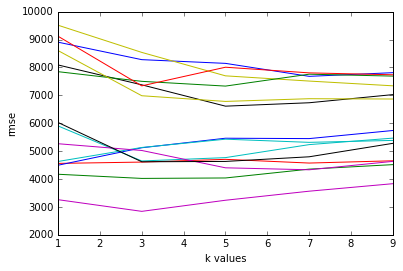

In [111]:
for feat, k_rmse in k_rmse_per_feat.items():
    x=[1, 3, 5, 7, 9]
    y=k_rmse
    plt.plot(x, y)
    plt.xlabel('k values')
    plt.ylabel('rmse')
plt.show()

## multivariate model

modify the model to accept multiple columns

In [112]:
def knn_train_test(training_col, target_col, df): 
    np.random.seed(1)
    shuffled_df=df.reindex(np.random.permutation(df.index))
    last_train_row=int(len(shuffled_df)/2)
    train_df=shuffled_df.iloc[0:last_train_row]
    test_df=shuffled_df.iloc[last_train_row:]
    knn=KNeighborsRegressor()
    knn.fit(train_df[training_col], train_df[target_col])
    predictions=knn.predict(test_df[training_col])
    rmse=math.sqrt(mean_squared_error(test_df[target_col], predictions))
    return rmse

Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value

In [117]:
train_feat=['engine-size', 'horsepower']
rmse=knn_train_test(train_feat, 'price', cars_clean)
print(rmse)

2949.8817277180374


Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value

In [118]:
train_feat=['engine-size', 'horsepower', 'curb-weight']
rmse=knn_train_test(train_feat, 'price', cars_clean)
print(rmse)

3435.2601095401815


Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value

In [119]:
train_feat=['engine-size', 'horsepower', 'curb-weight', 'highway-mpg']
rmse=knn_train_test(train_feat, 'price', cars_clean)
print(rmse)

3286.5597353252815


Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value

In [120]:
train_feat=['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'width']
rmse=knn_train_test(train_feat, 'price', cars_clean)
print(rmse)

3410.2170133901805


multiple k values with multivariate k-nearest neighbors model

In [130]:
def knn_train_test(training_col, target_col, df, k_values): 
    np.random.seed(1)
    shuffled_df=df.reindex(np.random.permutation(df.index))
    last_train_row=int(len(shuffled_df)/2)
    train_df=shuffled_df.iloc[0:last_train_row]
    test_df=shuffled_df.iloc[last_train_row:]
    k_rmse=[]
    for each_k in k_values:
        knn=KNeighborsRegressor(n_neighbors=each_k)
        knn.fit(train_df[training_col], train_df[target_col])
        predictions=knn.predict(test_df[training_col])
        rmse=math.sqrt(mean_squared_error(test_df[target_col], predictions))
        k_rmse.append(rmse)
    return k_rmse

In [135]:
k_rmse_per_scene={}
# 2 features
train_feat=['engine-size', 'horsepower']
k_values=range(1, 25)
k_rmse=knn_train_test(train_feat, 'price', cars_clean, k_values)
k_rmse_per_scene['2 featurs']=k_rmse
# 4 features
train_feat=['engine-size', 'horsepower', 'curb-weight', 'highway-mpg']
k_values=range(1, 25)
k_rmse=knn_train_test(train_feat, 'price', cars_clean, k_values)
k_rmse_per_scene['4 featurs']=k_rmse
# 5 features
train_feat=['engine-size', 'horsepower', 'curb-weight', 'highway-mpg', 'width']
k_values=range(1, 25)
k_rmse=knn_train_test(train_feat, 'price', cars_clean, k_values)
k_rmse_per_scene['5 featurs']=k_rmse
print(k_rmse_per_scene)
k_rmse_per_scene

{'2 featurs': [2783.6204237227344, 2657.7963807419765, 2792.586573031673, 2891.5329686923255, 2949.8817277180374, 3096.402601694776, 3164.681969020496, 3413.228359192009, 3748.6716603306486, 4080.7125057341937, 4215.6372280600335, 4275.421524277872, 4373.901683035496, 4424.285137239815, 4539.505493095937, 4667.307671446768, 4729.605305844226, 4790.556632159094, 4824.3866193292615, 4840.850914693829, 4837.429062000271, 4831.16988267597, 4861.679492959275, 4903.346008862579], '4 featurs': [2927.820116343107, 2600.431466008274, 2799.0983199667144, 3074.9999988931822, 3286.5597353252815, 3705.1702717384333, 3822.180444798032, 3986.7014080509525, 4210.340136384571, 4213.315457869819, 4182.323353796191, 4288.696189501458, 4249.894628724804, 4357.287937912011, 4451.408927529352, 4459.2244133241875, 4495.028598279714, 4546.50352887804, 4643.185310790349, 4668.634597012364, 4698.7862455275545, 4700.1491313974975, 4711.210423921079, 4739.97994062864], '5 featurs': [2824.7061233282866, 2915.67316

{'2 featurs': [2783.6204237227344,
  2657.7963807419765,
  2792.586573031673,
  2891.5329686923255,
  2949.8817277180374,
  3096.402601694776,
  3164.681969020496,
  3413.228359192009,
  3748.6716603306486,
  4080.7125057341937,
  4215.6372280600335,
  4275.421524277872,
  4373.901683035496,
  4424.285137239815,
  4539.505493095937,
  4667.307671446768,
  4729.605305844226,
  4790.556632159094,
  4824.3866193292615,
  4840.850914693829,
  4837.429062000271,
  4831.16988267597,
  4861.679492959275,
  4903.346008862579],
 '4 featurs': [2927.820116343107,
  2600.431466008274,
  2799.0983199667144,
  3074.9999988931822,
  3286.5597353252815,
  3705.1702717384333,
  3822.180444798032,
  3986.7014080509525,
  4210.340136384571,
  4213.315457869819,
  4182.323353796191,
  4288.696189501458,
  4249.894628724804,
  4357.287937912011,
  4451.408927529352,
  4459.2244133241875,
  4495.028598279714,
  4546.50352887804,
  4643.185310790349,
  4668.634597012364,
  4698.7862455275545,
  4700.14913139

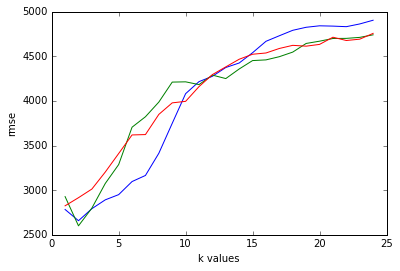

In [136]:
for feat, k_rmse in k_rmse_per_scene.items():
    x=range(1, 25)
    y=k_rmse
    plt.plot(x, y)
    plt.xlabel('k values')
    plt.ylabel('rmse')
plt.show()

it seems like k value of 3 produces the most unbiased model using with 